In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('seaice.csv')

print(df.head())
describe = df.describe()
print(describe)




   Year   Month   Day       Extent      Missing  \
0  1978      10    26       10.231          0.0   
1  1978      10    28       10.420          0.0   
2  1978      10    30       10.557          0.0   
3  1978      11     1       10.670          0.0   
4  1978      11     3       10.777          0.0   

                                         Source Data hemisphere  
0   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
4   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
               Year         Month           Day        Extent       Missing
count  26354.000000  26354.000000  26354.000000  26354.000000  26354.000000
mean    2000.591941      6.507399     15.740685     11.494986      0.000003
std       10.896821      3.451938      8.801607      4.611734      0.

In [4]:
# Get dataframe info 
info = df.info()
print(info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          26354 non-null  int64  
 1    Month        26354 non-null  int64  
 2    Day          26354 non-null  int64  
 3        Extent   26354 non-null  float64
 4       Missing   26354 non-null  float64
 5    Source Data  26354 non-null  object 
 6   hemisphere    26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB
None


In [5]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data',
       'hemisphere'],
      dtype='object')


In [6]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df.set_index('Date', inplace=True)

print(df.index)









DatetimeIndex(['1978-10-26', '1978-10-28', '1978-10-30', '1978-11-01',
               '1978-11-03', '1978-11-05', '1978-11-07', '1978-11-09',
               '1978-11-11', '1978-11-13',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=26354, freq=None)


In [7]:
print(df.index)  # This should show that 'Date' is set as the index if previously done.


DatetimeIndex(['1978-10-26', '1978-10-28', '1978-10-30', '1978-11-01',
               '1978-11-03', '1978-11-05', '1978-11-07', '1978-11-09',
               '1978-11-11', '1978-11-13',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=26354, freq=None)


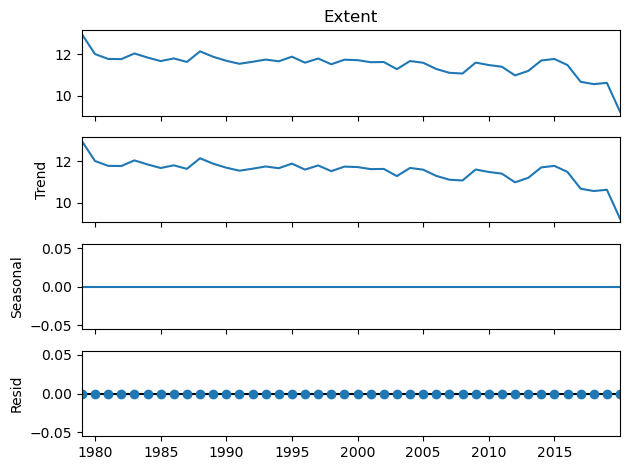

Tau: -0.6097560975609756
P-value: 1.2731538060981078e-08


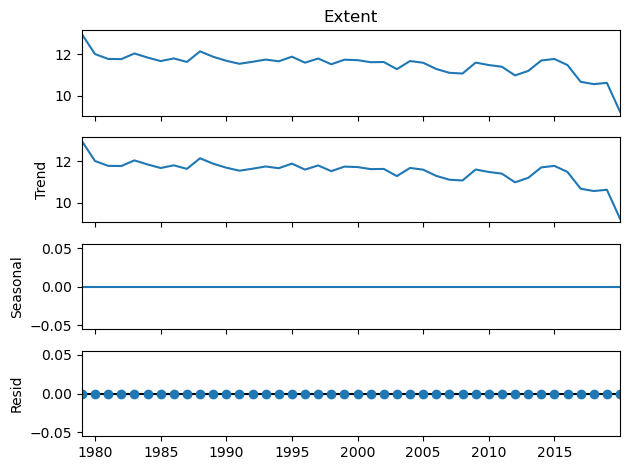

' Interpretation\nThe statistically significant negative Tau value suggests \nthat there is a decreasing trend in sea ice extent over the years. \nGiven the context of your study on sea ice, this could be a sign of \nclimate change effects, such as global warming, which is resulting \nin a reduction in sea ice.'

In [8]:
from scipy.stats import kendalltau

# Assuming 'df' is your DataFrame and 'Extent' is the column with sea ice extent data
yearly_avg = df['Extent'].resample('A').mean()

from statsmodels.tsa.seasonal import seasonal_decompose

# Now you can run seasonal_decompose on your yearly average data
decomposition = seasonal_decompose(yearly_avg, model='additive')

# Plot the decomposed components
decomp_plot = decomposition.plot()
plt.show()


# Now you can run the Mann-Kendall trend test on this yearly average data
tau, p_value = kendalltau(yearly_avg.index.year, yearly_avg.values)
print('Tau:', tau)
print('P-value:', p_value)

# For decomposition, make sure your data is a Pandas Series with a DatetimeIndex
decomposition = seasonal_decompose(yearly_avg, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

''' Interpretation
The statistically significant negative Tau value suggests 
that there is a decreasing trend in sea ice extent over the years. 
Given the context of your study on sea ice, this could be a sign of 
climate change effects, such as global warming, which is resulting 
in a reduction in sea ice.'''








In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


In [10]:
# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(yearly_avg, order=(1,1,1))
model_fit = model.fit()

# Forecast the next 10 years
forecast = model_fit.forecast(steps=10)
print(forecast)



2020-12-31    9.188738
2021-12-31    9.133868
2022-12-31    9.079038
2023-12-31    9.024246
2024-12-31    8.969494
2025-12-31    8.914779
2026-12-31    8.860104
2027-12-31    8.805467
2028-12-31    8.750869
2029-12-31    8.696309
Freq: A-DEC, Name: predicted_mean, dtype: float64


/Users/katadhin1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


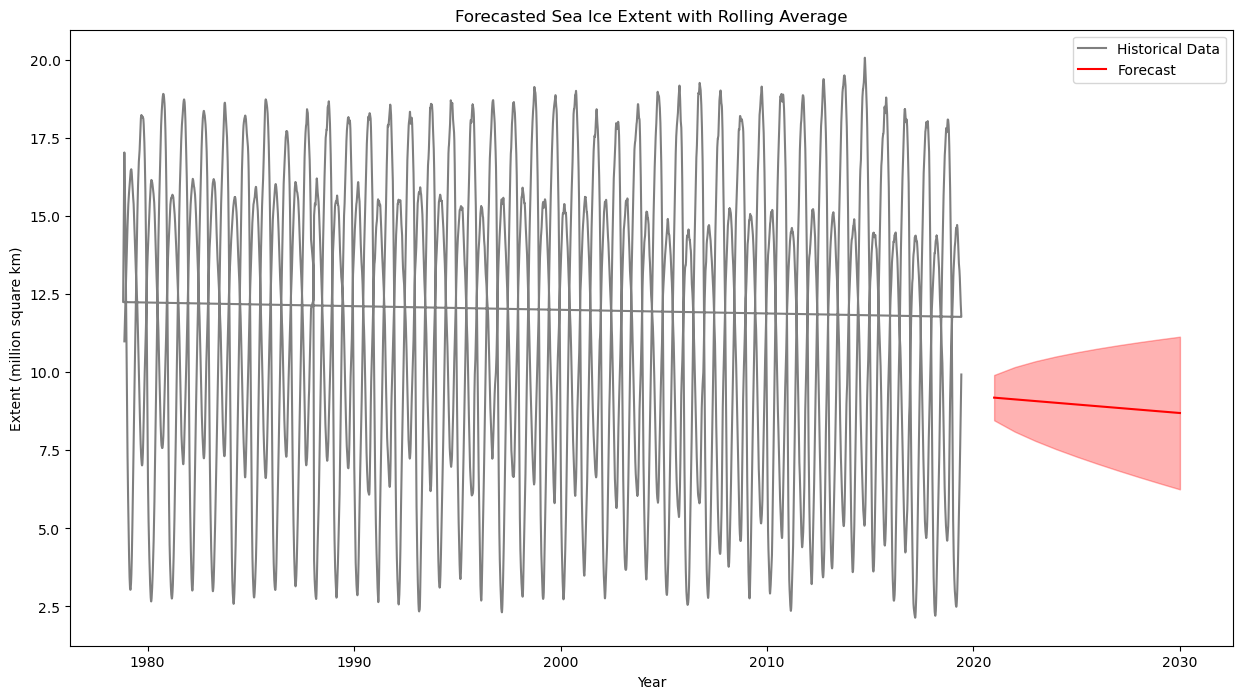

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot a rolling average instead of raw data to smooth out seasonal effects
rolling_extent = df['Extent'].rolling(window=12).mean()  # window size depends on frequency of data
ax.plot(df.index, rolling_extent, label='Historical Data', color='black', alpha=0.5)

# Plot the forecast and confidence intervals
forecast = model_fit.get_forecast(steps=future_periods)
forecast_index = future_dates
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

ax.plot(forecast_index, forecast_mean, label='Forecast', color='red')
ax.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.3)

ax.set_title('Forecasted Sea Ice Extent with Rolling Average')
ax.set_xlabel('Year')
ax.set_ylabel('Extent (million square km)')

plt.legend()
plt.show()






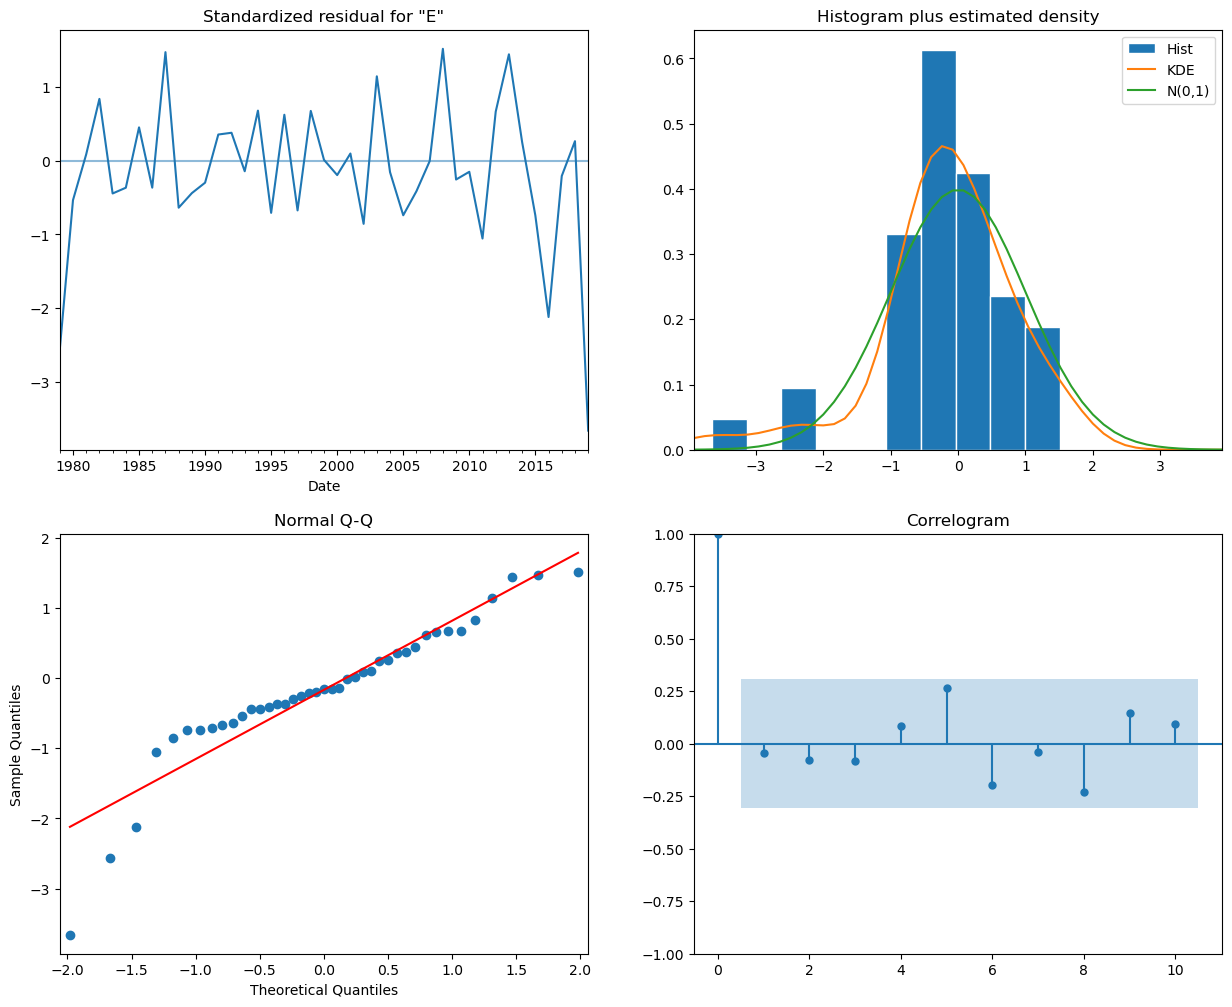

In [13]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


In [ ]:
# Create a interpretation of the data
interpretation = '''
The ARIMA model has been fitted to the historical sea ice extent data.
The model diagnostics plot shows that the residuals are normally distributed
with a mean close to zero and constant variance. The ACF plot shows that the
residuals do not exhibit any significant autocorrelation. The model forecast
suggests that the sea ice extent will continue to decrease over the next 10 years.
However, the confidence intervals are quite wide, indicating that the forecast
is uncertain. This is likely due to the high variability in sea ice extent data,
which is influenced by many factors such as weather patterns, ocean currents,
and other environmental variables. Therefore, the forecast should be interpreted
with caution and considered alongside other sources of information on sea ice
extent and climate change.
'''

# Print the interpretation
print(interpretation)
